In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [133]:
df = pd.read_csv('AirBNB.csv')
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [134]:
# id will not help in the analysis in any way...so deleting the same. 

df = df.drop(['id'],axis=1)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


# Pre-Processing

In [136]:
# 1. Missing data

df.isnull().sum()/len(df) *100

room_type                0.006747
accommodates             0.004048
bathrooms                0.273913
cancellation_policy      0.010795
cleaning_fee             0.005397
instant_bookable         0.000000
review_scores_rating    22.563452
bedrooms                 0.124138
beds                     0.176762
log_price                0.000000
dtype: float64

In [137]:
df['room_type'].value_counts()

Entire home/apt    41308
Private room       30635
Shared room         2163
Name: room_type, dtype: int64

In [138]:
df['room_type'] = df['room_type'].fillna('Entire home/apt')

In [139]:
df.isnull().sum()

room_type                   0
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

In [140]:
df['accommodates'].value_counts()

2.0     31853
4.0     12066
1.0      9434
3.0      7793
6.0      4968
5.0      3444
8.0      1795
7.0       946
10.0      701
16.0      301
9.0       270
12.0      264
14.0      104
11.0       79
15.0       54
13.0       36
Name: accommodates, dtype: int64

In [141]:
df['accommodates'] = df['accommodates'].fillna(2.0)

In [142]:
df['bathrooms'].value_counts()

1.0    58096
2.0     7936
1.5     3801
2.5     1567
3.0     1066
3.5      429
4.0      286
0.5      209
0.0      198
4.5      116
5.0       72
8.0       41
5.5       39
6.0       24
6.5       12
7.0       10
7.5        6
Name: bathrooms, dtype: int64

In [143]:
df['bathrooms'] = df['bathrooms'].fillna(1.0)

In [144]:
df['cancellation_policy'].value_counts()

strict      32500
flexible    22543
moderate    19060
Name: cancellation_policy, dtype: int64

In [145]:
df['cancellation_policy'] = df['cancellation_policy'].fillna("strict")

In [146]:
df['cleaning_fee'].value_counts()

True     54399
False    19708
Name: cleaning_fee, dtype: int64

In [147]:
df['cleaning_fee'] = df['cleaning_fee'].fillna(True)

In [148]:
df['review_scores_rating'].value_counts()

100.0    16215
98.0      4374
97.0      4087
96.0      4081
95.0      3713
93.0      3647
90.0      2852
99.0      2631
94.0      2618
80.0      2163
92.0      2064
91.0      1615
89.0      1120
87.0      1119
88.0      1056
85.0       625
86.0       512
60.0       444
84.0       438
83.0       403
82.0       211
70.0       196
73.0       157
81.0       126
75.0       101
20.0        97
78.0        94
40.0        90
79.0        83
76.0        76
77.0        74
67.0        66
74.0        39
72.0        38
50.0        30
65.0        28
68.0        20
71.0        14
69.0        13
63.0        11
53.0        10
64.0        10
47.0         5
30.0         4
62.0         3
66.0         3
55.0         3
57.0         3
27.0         2
35.0         1
49.0         1
58.0         1
54.0         1
56.0         1
Name: review_scores_rating, dtype: int64

In [149]:
df['review_scores_rating'] = df['review_scores_rating'].fillna(100.0)

In [150]:
df['bedrooms'].value_counts()

1.0     49783
2.0     11351
0.0      6715
3.0      4309
4.0      1330
5.0       355
6.0       106
7.0        38
8.0        14
10.0       10
9.0         8
Name: bedrooms, dtype: int64

In [151]:
df['bedrooms'] = df['bedrooms'].fillna(1.0)

In [152]:
df['beds'].value_counts()

1.0     45144
2.0     16704
3.0      6442
4.0      3065
5.0      1287
6.0       661
7.0       216
8.0       186
10.0       88
9.0        72
16.0       38
12.0       29
11.0       23
13.0       10
15.0        6
14.0        4
0.0         4
18.0        1
Name: beds, dtype: int64

In [153]:
df['beds'] = df['beds'].fillna(1.0)

In [154]:
df.isnull().sum()

room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

In [155]:
# 2. Outliers

df.describe()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,3.155078,1.234628,95.405972,1.265467,1.709611,4.782069
std,2.153572,0.581386,7.328337,0.851671,1.253389,0.717394
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,93.000000,1.000000,1.000000,4.317488
50%,2.000000,1.000000,98.000000,1.000000,1.000000,4.709530
75%,4.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


3. Encoding - Will do after the EDA processs....Needs encoding...there are many features which are object format. 

4. Imbalance dataset check is not required...as it is a linear regression problem.

5. Feature scaling will  be done after seeing the model accuracy. 

# EDA

In [156]:
df.columns

Index(['room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

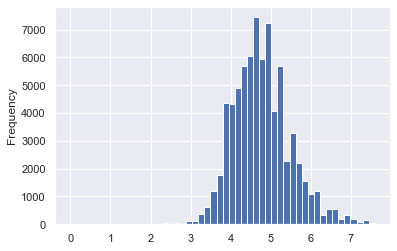

In [157]:
df['log_price'].plot(kind='hist',bins=50)

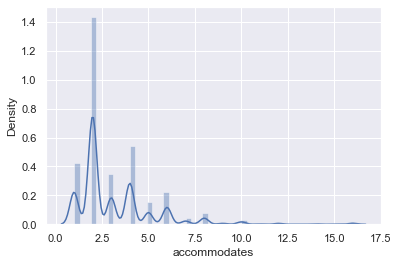

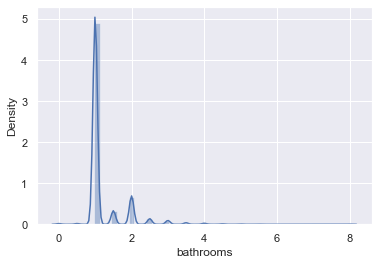

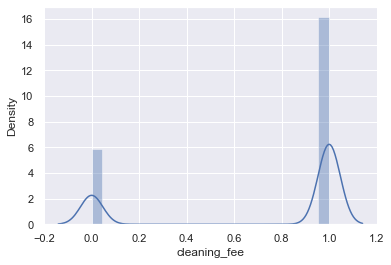

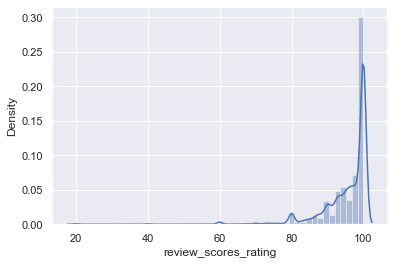

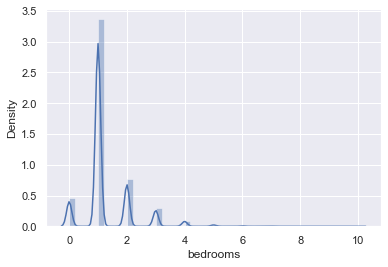

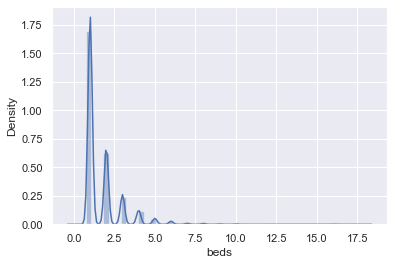

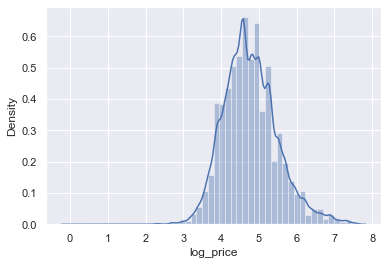

In [158]:
def dist(i):
    sns.distplot(df[i])
    plt.show()
    
for i in df.select_dtypes(exclude='object').columns:
    dist(i)

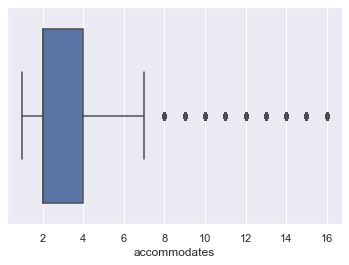

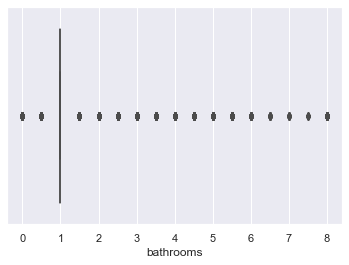

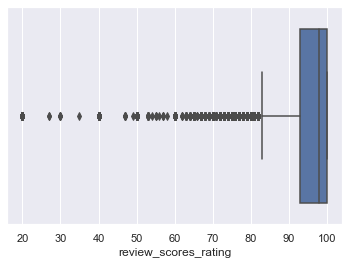

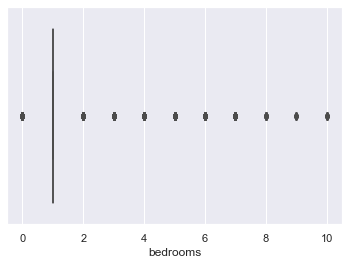

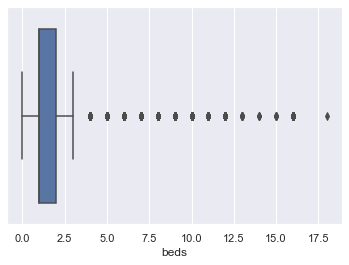

In [159]:
cols = ['accommodates','bathrooms','review_scores_rating','bedrooms','beds']

for i in cols:
    sns.boxplot(df[i])
    plt.show()

<AxesSubplot:>

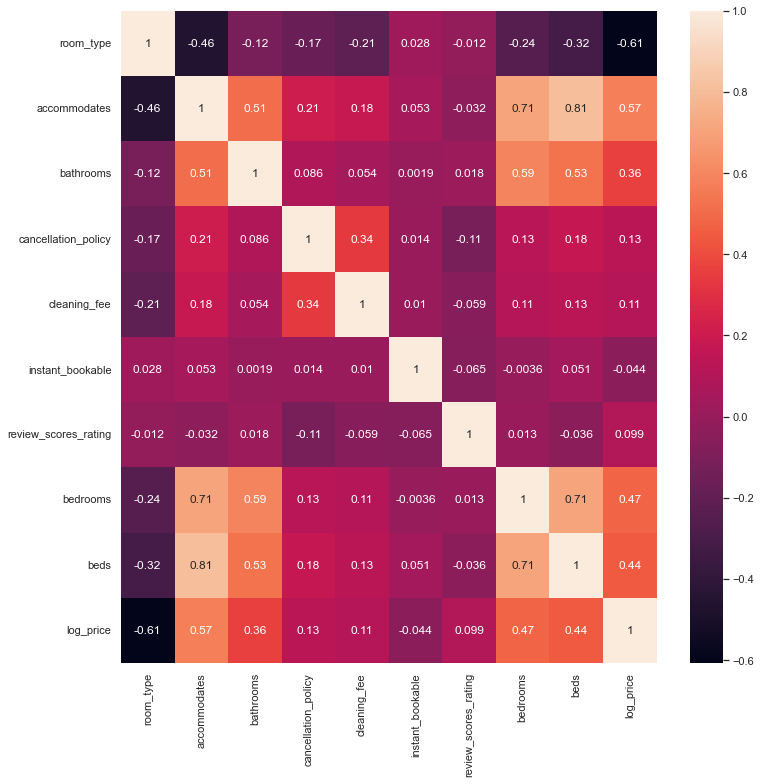

In [191]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

Not much correlation seen in the varibales.

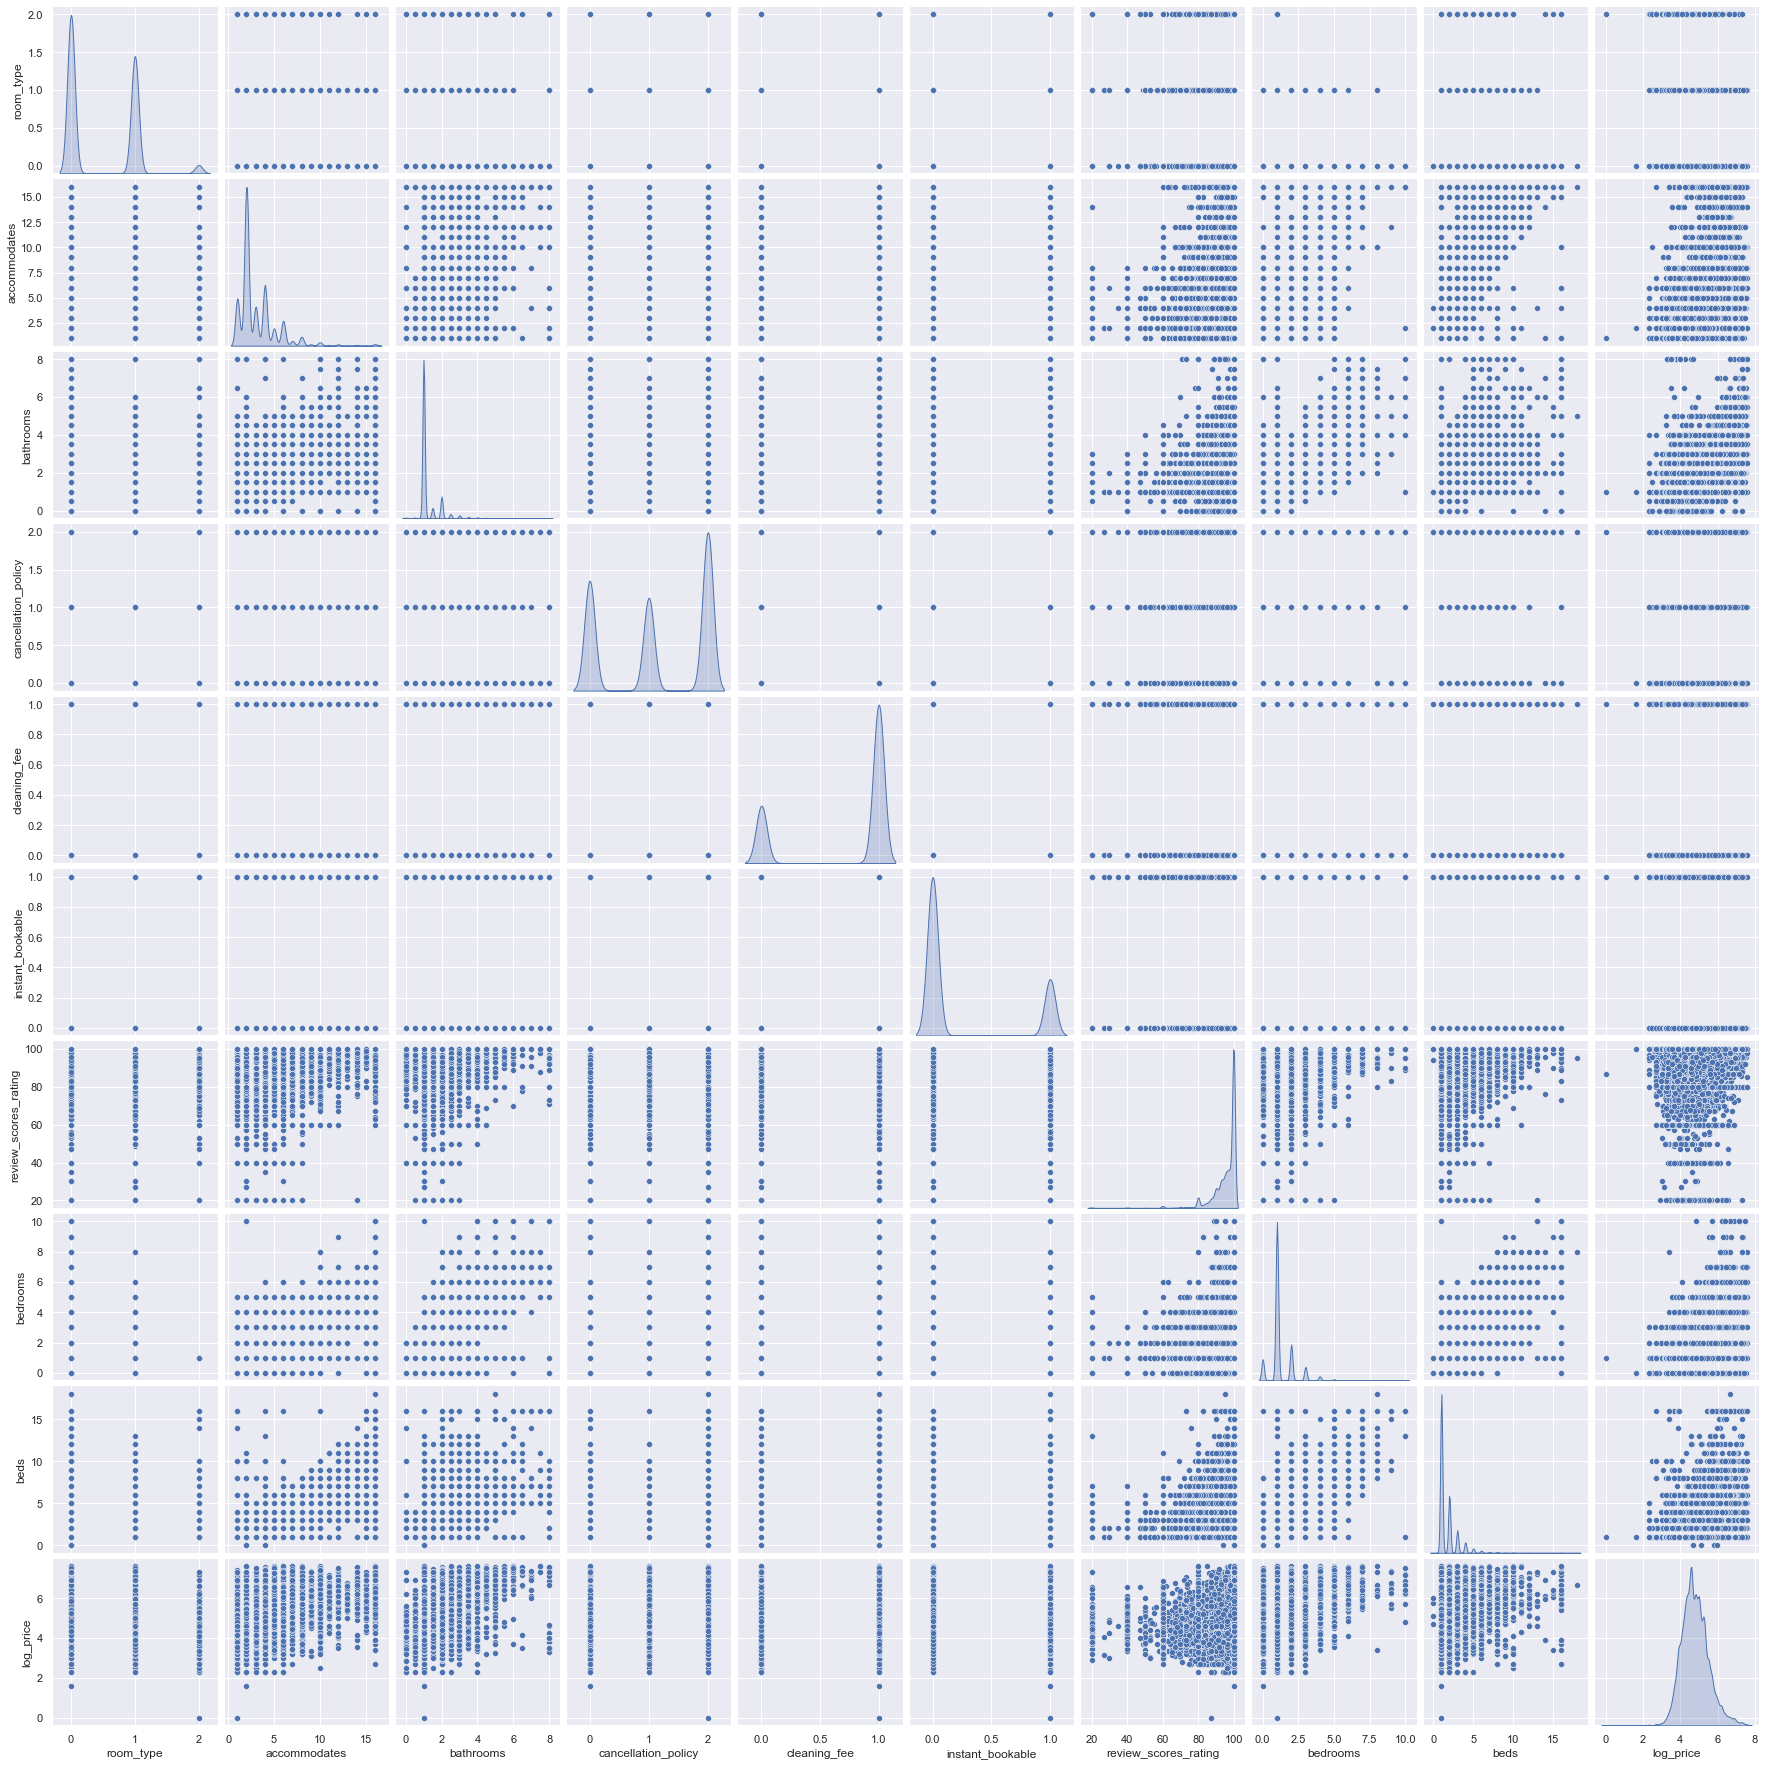

In [192]:
sns.pairplot(df, diag_kind='kde')

In [ ]:


from pandas_profiling import ProfileReport

report = ProfileReport(df)
report.to_file('AirBnB.html')

In [161]:
# ENcoding

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74111 non-null  object 
 1   accommodates          74111 non-null  float64
 2   bathrooms             74111 non-null  float64
 3   cancellation_policy   74111 non-null  object 
 4   cleaning_fee          74111 non-null  bool   
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  74111 non-null  float64
 7   bedrooms              74111 non-null  float64
 8   beds                  74111 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: bool(1), float64(6), object(3)
memory usage: 5.2+ MB


In [164]:
df1 = df.copy()

In [165]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df1['room_type'] = le.fit_transform(df['room_type'])
df1['cancellation_policy'] = le.fit_transform(df['cancellation_policy'])
df1['cleaning_fee'] = le.fit_transform(df['cleaning_fee'])
df1['instant_bookable'] = le.fit_transform(df['instant_bookable'])

In [166]:
df1.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,0,3.0,1.0,2,1,0,100.0,1.0,1.0,5.010635
1,0,7.0,1.0,2,1,1,93.0,3.0,3.0,5.129899
2,0,5.0,1.0,1,1,1,92.0,1.0,3.0,4.976734
3,0,4.0,1.0,0,1,0,100.0,2.0,2.0,6.620073
4,0,2.0,1.0,1,1,1,40.0,0.0,1.0,4.744932


# SPLITING THE IDV and DV into two spearate files.

In [167]:
x=df1.drop(['log_price'],axis=1)
y = df1['log_price']

# Feature Scaling

In [168]:
# Feature Scaling. 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x

array([[-0.85060306, -0.07201025, -0.40356879, ...,  0.62688966,
        -0.31170305, -0.56615806],
       [-0.85060306,  1.78538165, -0.40356879, ..., -0.32831299,
         2.03663738,  1.02952706],
       [-0.85060306,  0.8566857 , -0.40356879, ..., -0.46477052,
        -0.31170305,  1.02952706],
       ...,
       [-0.85060306,  0.8566857 , -0.40356879, ..., -0.19185547,
         0.86246716,  0.2316845 ],
       [-0.85060306, -0.53635822, -0.40356879, ...,  0.62688966,
        -1.48587327,  0.2316845 ],
       [-0.85060306,  0.39233773, -0.40356879, ...,  0.08105957,
        -0.31170305,  0.2316845 ]])

# Spling the IDV and DV into train and test datasers.

In [169]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(sc_x,y,test_size=0.2,random_state=101)
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=101)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
print(x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape)

(59288, 9) (14823, 9) (59288,) (14823,)
(59288, 9) (14823, 9) (59288,) (14823,)


# Model Building

In [177]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
y_pred_lr_train = lr.predict(x_train)


# without feature scaled data. 

lr1 = LinearRegression()
lr1.fit(x_train1,y_train1)
y_pred_lr1 = lr1.predict(x_test1)
y_pred_lr1_train = lr1.predict(x_train1)

###  Evaluation of the model. 

In [178]:
from sklearn.metrics import r2_score
print("With scaling Testing Score- ",r2_score(y_test,y_pred_lr))
print("With scaling Training Score- ",r2_score(y_train,y_pred_lr_train))
print("************************************************")
print("Without scaling Testing Score - ",r2_score(y_test1,y_pred_lr1))
print("Without scaling Testing Score - ",r2_score(y_train1,y_pred_lr1_train))

With scaling Testing Score-  0.5257498822713489
With scaling Training Score-  0.5186357147386331
************************************************
Without scaling Testing Score -  0.5257498822713493
Without scaling Testing Score -  0.5186357147386331


Very bad score....with or without scaled data. 
we will try to use other model. 

The variance is less but the accuracy is very low. 

We will build OLS model and check other parameters.

In [ ]:
# OLS -  Ordinary Least Square

In [180]:
from statsmodels.regression.linear_model  import OLS
import statsmodels.regression.linear_model as smf
import statsmodels.api as sm

In [182]:
x_ols = sm.add_constant(x)

In [183]:
x_ols

,const,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds
0,1.0,0,3.0,1.0,2,1,0,100.0,1.0,1.0
1,1.0,0,7.0,1.0,2,1,1,93.0,3.0,3.0
2,1.0,0,5.0,1.0,1,1,1,92.0,1.0,3.0
3,1.0,0,4.0,1.0,0,1,0,100.0,2.0,2.0
4,1.0,0,2.0,1.0,1,1,1,40.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
74106,1.0,1,1.0,1.0,0,0,0,100.0,1.0,1.0
74107,1.0,0,4.0,2.0,1,1,0,93.0,2.0,4.0
74108,1.0,0,5.0,1.0,1,1,1,94.0,2.0,2.0
74109,1.0,0,2.0,1.0,2,1,1,100.0,0.0,2.0


In [184]:
ols=smf.OLS(endog = y, exog=x_ols).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     8922.
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        03:37:13   Log-Likelihood:                -53341.
No. Observations:               74111   AIC:                         1.067e+05
Df Residuals:                   74101   BIC:                         1.068e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.7476      0.025    148.409      0.000       3.698       3.797
room_type               -0.6083      0.004   -159.296      0.000      -0.616      -0.601
accommodates             0.0830      0.002     49.870      0.000       0.080       0.086
bathrooms                0.1423      0.004     35.671      0.000       0.134       0.150
cancellation_policy      0.0039      0.002      1.668      0.095      -0.001       0.008
cleaning_fee            -0.0716      0.004    -16.053      0.000      -0.080      -0.063
instant_bookable        -0.0544      0.004    -13.019      0.000      -0.063      -0.046
review_scores_rating     0.0088      0.000     34.980      0.000       0.008       0.009
bedrooms                 0.1497      0.003     43.674      0.000       0.143       0.156
beds                    -0.0492      0.003    -18.528      0.000      -0.054      -0.044
==============================================================================
Omnibus:                     8209.580   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21275.640
Skew:                           0.636   Prob(JB):                         0.00
Kurtosis:                       5.296   Cond. No.                     1.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
1. Adjusted r2-squared value is not very good. For OLS also, the accuracy is 52% only. 

2. cancellation_policy - is the only varibale which has greater p-value and is not a significant variable. 

3. Durbin Watson test is also good...the data is not showing any autocorrelation. 

4. Data is normally distributed. 

5. Endogenity - right iDV has been selected. 

6. q-q plot(below) looks like it is in a linear line

7. As seen in pair plot, all are linearly associated.

8. Correlation matrix is good...not much correlation seen. 

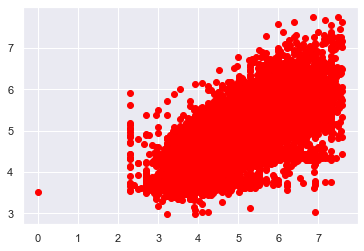

In [193]:
plt.scatter(y_train,lr.predict(x_train),color='red')

### Other evaluation Matrics. 

In [198]:
from  sklearn import metrics
print("Mean Square Error - ",metrics.mean_squared_error(y_test,y_pred_lr))
print("Root Mean Square Error - ",np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr)))
print("Mean Absolute Error - ",metrics.mean_absolute_error(y_test,y_pred_lr))
print("Mean Absolute Percentage Error - ",metrics.mean_absolute_error(y_test,y_pred_lr)*100)

Mean Square Error -  0.24560255893628996
Root Mean Square Error -  0.495583049484433
Mean Absolute Error -  0.3784239926390961
Mean Absolute Percentage Error -  37.84239926390961


All the scores also shows not a very good model. 

# DONE